['Tesla Model 3' 'CHEVY BOLT' 'Audi e-Tro' 'Chevy Bolt' 'Nissan Leaf'
 'Chevy Bol' 'NISSAN LEAF' 'Nissan Lea' 'Audi e-Tron' 'Unknown'
 'TESLA MODEL 3' 'Nissan Leaf#' 'audi e-tron' 'Tesla Model' 'Hyundai Kon'
 'HYUNDAI KONA' 'Audi e-Tron#' 'Tesla Model 3#' 'Chevy Bolt#'
 'Hyundai Kona' 'AUDI E-TRON' 'nissan leaf' 'tesla model 3' 'chevy bolt'
 'hyundai kona' 'Hyundai Kona#']
['Chicago#' 'Seattle#' 'Los Angele' 'los angeles' 'new york' 'Seattl'
 'SEATTLE' 'CHICAGO' 'LOS ANGELES' 'Unknown' 'New York' 'Los Angeles#'
 'SAN FRANCISCO' 'San Francisco' 'Los Angeles' 'Seattle' 'San Francisco#'
 'Chicag' 'New Yor' 'seattle' 'San Francisc' 'san francisco' 'chicago'
 'New York#' 'NEW YORK' 'Chicago']
['Nigh' 'Morning' 'Mornin' 'morning' 'NIGHT' 'Morning#' 'Night' 'Unknown'
 'afternoon' 'MORNING' 'Afternoon' 'EVENING' 'Night#' 'Afternoon#'
 'evening' 'Evening#' 'Afternoo' 'AFTERNOON' 'Evening' 'Evenin' 'night']
['SATURDAY' 'Wednesday#' 'THURSDAY' 'Wednesda' 'monday' 'tuesday' 'FRIDAY'
 'Monda' 'Wedn

<ipython-input-3-cf4ef262b848>:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargingStartDateOnly'] = df['ChargingStartTime'].str.split(' ').str[0]
<ipython-input-3-cf4ef262b848>:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargingStartTimeOnly'] = df['ChargingStartTime'].str.split(' ').str[1]
<ipython-input-3-cf4ef262b848>:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

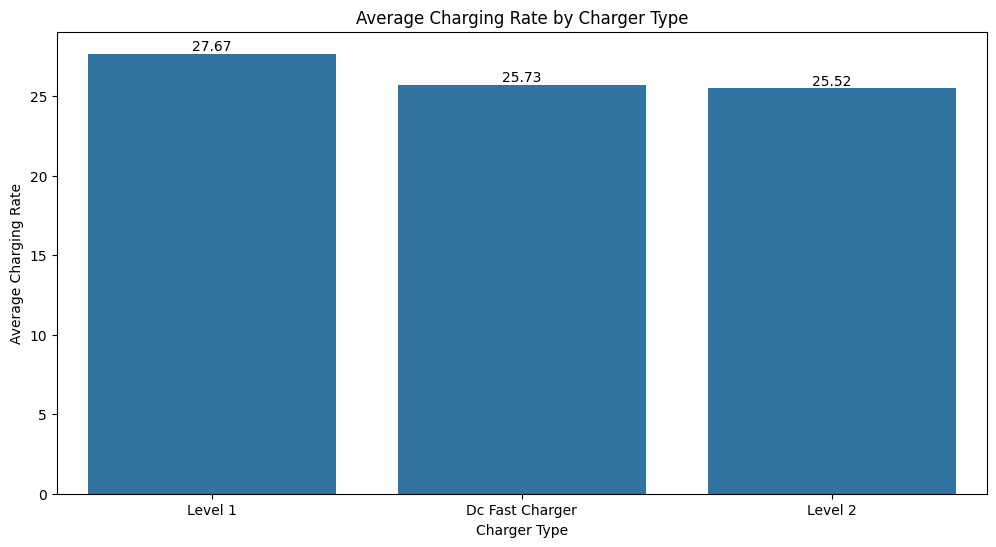

  ChargingStationLocation  Cost/EnergyConsumption
0                 Chicago                0.858363
1             Los Angeles                0.971642
2                New York                0.857075
3           San Francisco                1.062630
4                 Seattle                0.998453


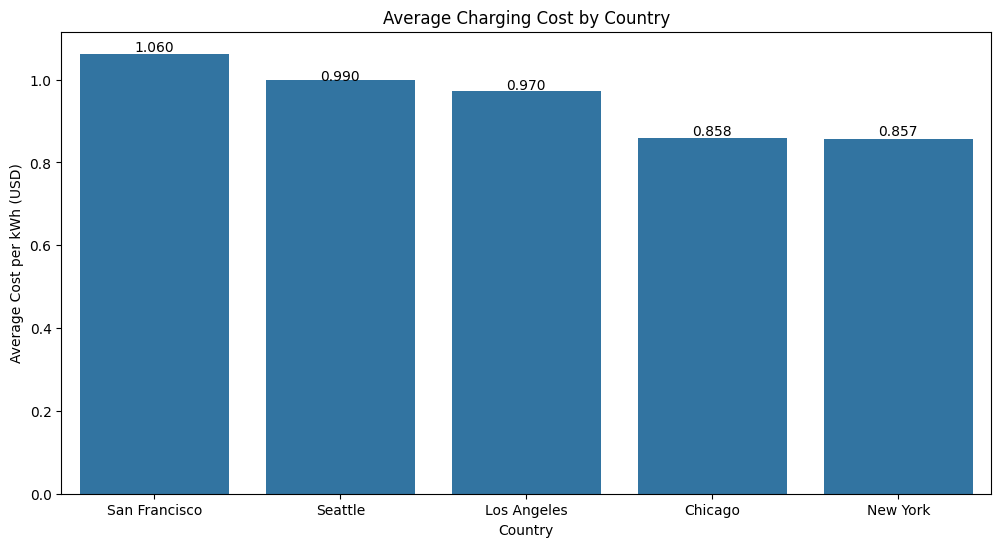

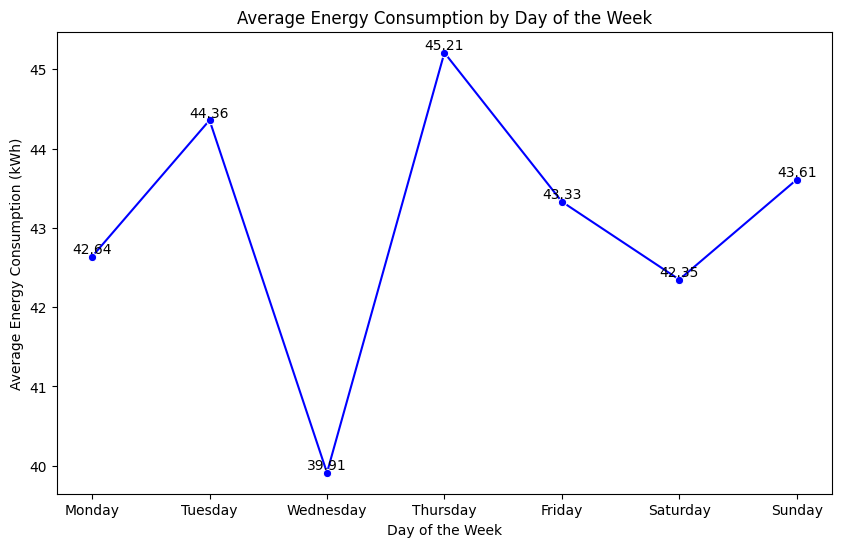

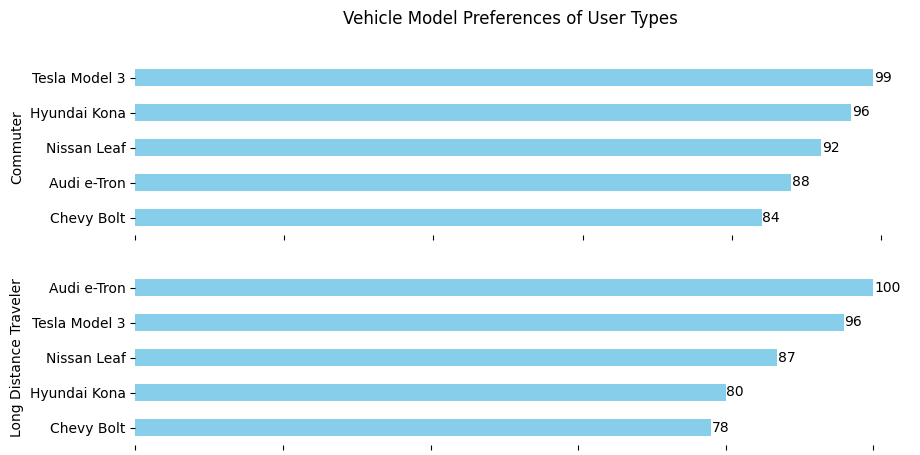

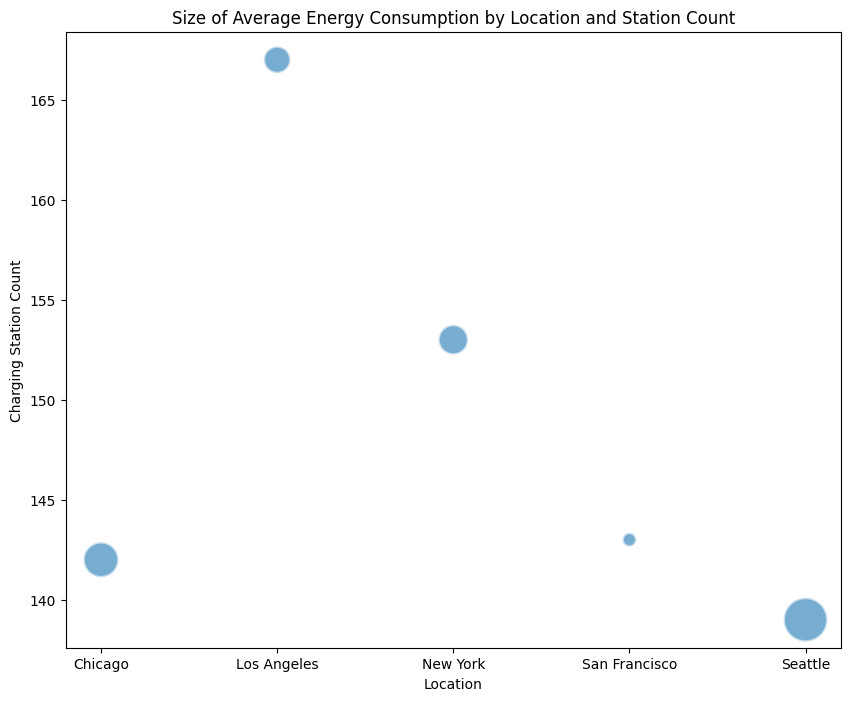

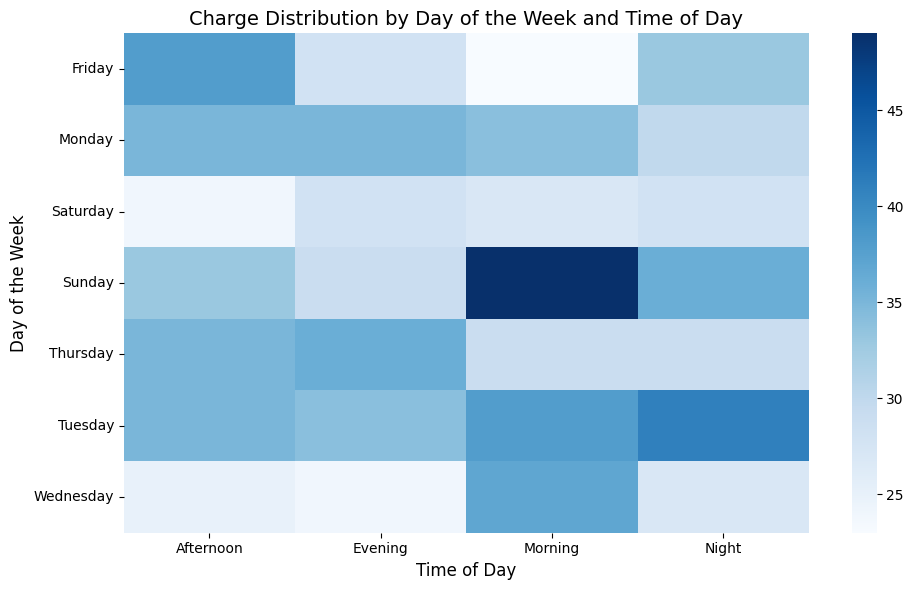

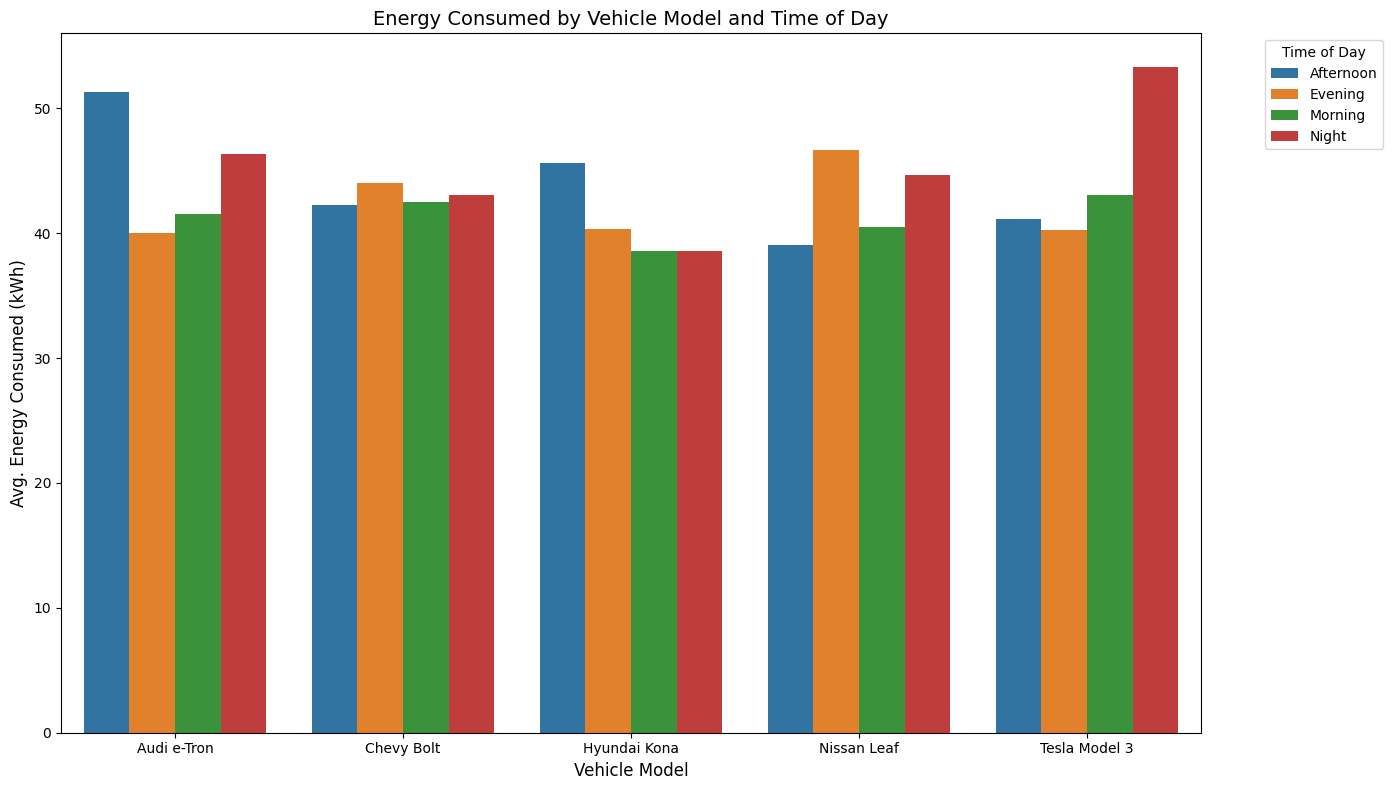

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading dataset
#data_path = 'C:/Users/ESK/Desktop/112 FINAL PROJECT/EV_Charging_Patterns_Dirty.csv'
df= pd.read_csv(data_path)

#Renaming columns for better readability
df = df.rename(columns={
    'user id': 'UserId',
    'VehicleModel': 'VehicleModel',
    'BatteryCapacitykWh': 'BatteryCapacityKWh',
    'Charging_StationID': 'ChargingStationId',
    'Charging StationLocation': 'ChargingStationLocation',
    'Charging StartTime': 'ChargingStartTime',
    'Charging EndTime': 'ChargingEndTime',
    'Energy ConsumedKWh': 'EnergyConsumedKwh',
    'ChargingDuration_hours': 'ChargingDurationHours',
    'ChargingRateKW': 'ChargingRateKW',
    'ChargingCostUSD': 'ChargingCostUSD',
    'TimeofDay': 'TimeOfDay',
    'DayofWeek': 'DayOfWeek',
    'State_of_Charge_Start%': 'StateOfChargeStart%',
    'State_of_Charge_End%': 'StateOfChargeEnd%',
    'Distance_Driven_km': 'DistanceDrivenKm',
    'TemperatureC': 'TemperatureC',
    'VehicleAge_years': 'VehicleAgeYears',
    'ChargerType': 'ChargerType',
    'UserType': 'UserType'
})


#UserId is not necessary therefore, they removed.
df.drop('UserId', axis=1, inplace=True)


# In this part various preprocessing steps applied to following columns ;"VehicleModel" "ChargingStationLocation" "TimeOfDay" "DayOfWeek" "ChargerType" "UserType"

#Trimming Whitespaces
df['VehicleModel'] = df['VehicleModel'].str.strip()
df['ChargingStationLocation'] = df['ChargingStationLocation'].str.strip()
df['TimeOfDay'] = df['TimeOfDay'].str.strip()
df['DayOfWeek'] = df['DayOfWeek'].str.strip()
df['ChargerType'] = df['ChargerType'].str.strip()
df['UserType'] = df['UserType'].str.strip()

#Nan values filled with "Unknown" to deal them in coherent manner
df['VehicleModel'] = df['VehicleModel'].fillna('Unknown')
df['ChargingStationLocation'] = df['ChargingStationLocation'].fillna('Unknown')
df['TimeOfDay'] = df['TimeOfDay'].fillna('Unknown')
df['DayOfWeek'] = df['DayOfWeek'].fillna('Unknown')
df['ChargerType'] = df['ChargerType'].fillna('Unknown')
df['UserType'] = df['UserType'].fillna('Unknown')

#In order to correct incorrect string representations. All unique strings are demonstrated.
#After demonstration, correct forms of strings are decided.
print(df['VehicleModel'].unique())
print(df['ChargingStationLocation'].unique())
print(df['TimeOfDay'].unique())
print(df['DayOfWeek'].unique())
print(df['ChargerType'].unique())
print(df['UserType'].unique())

#All of the strings are mapped to a correct form.
model_mapping = {
    'Tesla Model 3':"Tesla Model 3",
    'CHEVY BOLT':"Chevy Bolt",
    'Audi e-Tro':"Audi e-Tron",
    'Chevy Bolt':"Chevy Bolt",
    'Nissan Leaf':"Nissan Leaf",
    'Chevy Bol':"Chevy Bolt",
    'NISSAN LEAF':"Nissan Leaf",
    'Nissan Lea':"Nissan Leaf",
    'Audi e-Tron':"Audi e-Tron",
    'TESLA MODEL 3':"Tesla Model 3",
    'Nissan Leaf#':"Nissan Leaf",
    'audi e-tron':"Audi e-Tron",
    'Tesla Model':"Tesla Model 3",
    'Hyundai Kon':"Hyundai Kona",
    'HYUNDAI KONA':"Hyundai Kona",
    'Audi e-Tron#':"Audi e-Tron",
    'Tesla Model 3#':"Tesla Model 3",
    'Chevy Bolt#':"Chevy Bolt",
    'Hyundai Kona':"Hyundai Kona",
    'AUDI E-TRON':"Audi e-Tron",
    'nissan leaf':"Nissan Leaf",
    'tesla model 3':"Tesla Model 3",
    'chevy bolt':"Chevy Bolt",
    'hyundai kona':"Hyundai Kona",
    'Hyundai Kona#':"Hyundai Kona",
    'Chicago#' : "Chicago",
    'Seattle#' : "Seattle",
    'Los Angele': "Los Angeles",
    'los angeles': "Los Angeles",
    'new york': "New York",
    'Seattl': "Seattle",
    'SEATTLE': "Seattle",
    'CHICAGO' : "Chicago",
    'LOS ANGELES': "Los Angeles",
    'New York': "New York",
    'Los Angeles#': "Los Angeles",
    'SAN FRANCISCO' : "San Francisco",
    'San Francisco': "San Francisco",
    'Los Angeles': "Los Angeles",
    'Seattle': "Seattle",
    'San Francisco#': "San Francisco",
    'Chicag': "Chicago",
    'New Yor' : "New York",
    'seattle' : "Seattle",
    'San Francisc': "San Francisco",
    'san francisco' : "San Francisco",
    'chicago' : "Chicago",
    'New York#' : "New York",
    'NEW YORK' : "New York",
    'Chicago': "Chicago",
    'Nigh' : "Night",
    'Morning' : "Morning",
    'Mornin' : "Morning",
    'morning': "Morning",
    'NIGHT' : "Night",
    'Morning#': "Morning",
    'Night' : "Night",
    'afternoon' : "Afternoon",
    'MORNING': "Morning",
    'Afternoon': "Afternoon",
    'EVENING' : "Evening",
    'Night#' : "Night",
    'Afternoon#' : "Afternoon",
    'evening': "Evening",
    'Evening#': "Evening",
    'Afternoo' : "Afternoon",
    'AFTERNOON' : "Afternoon",
    'Evening': "Evening",
    'Evenin' : "Evening",
    'night': "Night",
    'SATURDAY' :"Saturday",
    'Wednesday#':"Wednesday",
    'THURSDAY':"Thursday",
    'Wednesda':"Wednesday",
    'monday' :"Monday",
    'tuesday':"Tuesday",
    'FRIDAY':"Friday",
    'Monda' :"Monday",
    'Wednesday':"Wednesday",
    'MONDAY' :"Monday",
    'wednesday':"Wednesday",
    'Frida' :"Friday",
    'Sunday#':"Sunday",
    'WEDNESDAY' :"Wednesday",
    'Tuesday' :"Tuesday",
    'Tuesda' :"Tuesday",
    'friday' :"Friday",
    'Monday':"Monday",
    'saturday':"Saturday",
    'thursday':"Thursday",
    'Saturday#':"Saturday",
    'Thursday':"Thursday",
    'Sunda':"Sunday",
    'Friday' :"Friday",
    'sunday' :"Sunday",
    'Thursday#' :"Thursday",
    'Saturda':"Saturday",
    'Sunday' :"Sunday",
    'Monday#':"Monday",
    'SUNDAY' :"Sunday",
    'Thursda':"Thursday",
    'Saturday':"Saturday",
    'Friday#' :"Friday",
    'TUESDAY':"Tuesday",
    'Tuesday#':"Tuesday",
    'dc fast charger':"Dc Fast Charger",
    'LEVEL 1':"Level 1",
    'Level':"Level",
    'DC FAST CHARGER':"Dc Fast Charger",
    'LEVEL 2':"Level 2",
    'level 1':"Level 1",
    'Level 1#':"Level 1",
    'Level 1':"Level 1",
    'level 2' :"Level 2",
    'Level 2#':"Level 2",
    'DC Fast Charger#':"Dc Fast Charger",
    'DC Fast Charger':"Dc Fast Charger",
    'DC Fast Charge':"Dc Fast Charger",
    'Level 2':"Level 2",
    'Commute':"Commuter",
    'Long-Distance Traveler':"Long Distance Traveler",
    'Commuter':"Commuter",
    'long-distance traveler':"Long Distance Traveler",
    'Commuter#' :"Commuter",
    'COMMUTER' :"Commuter",
    'Long-Distance Travele' :"Long Distance Traveler",
    'commuter':"Commuter",
    'Long-Distance Traveler#':"Long Distance Traveler",
    'LONG-DISTANCE TRAVELER':"Long Distance Traveler",
    'Unknown':"Unknown"
}

#Strings are corrected for columns.
df['VehicleModel'] = df['VehicleModel'].replace(model_mapping)
df['ChargingStationLocation'] = df['ChargingStationLocation'].replace(model_mapping)
df['TimeOfDay'] = df['TimeOfDay'].replace(model_mapping)
df['DayOfWeek'] = df['DayOfWeek'].replace(model_mapping)
df['ChargerType'] = df['ChargerType'].replace(model_mapping)
df['UserType'] = df['UserType'].replace(model_mapping)



#Checking whether they are truly corrected.
print(df['VehicleModel'].unique())
print(df['ChargingStationLocation'].unique())
print(df['TimeOfDay'].unique())
print(df['DayOfWeek'].unique())
print(df['ChargerType'].unique())
print(df['UserType'].unique())
#They are truly corrected.


#After standardizing the data, the 'Unknown' placeholder is replaced with NaN to indicate truly missing values
df['VehicleModel'] = df['VehicleModel'].replace('Unknown', np.nan)
df['ChargingStationLocation'] = df['ChargingStationLocation'].replace('Unknown', np.nan)
df['TimeOfDay'] = df['TimeOfDay'].replace('Unknown', np.nan)
df['DayOfWeek'] = df['DayOfWeek'].replace('Unknown', np.nan)
df['ChargerType'] = df['ChargerType'].replace('Unknown', np.nan)
df['UserType'] = df['UserType'].replace('Unknown', np.nan)

#HANDLING MISSING VALUES
#Counting missing values
print(df.isna().sum()) #There is no missing values for numeric variables.Each categorical variable have 150 missing values.
is_ALL_na = df[df[['VehicleModel', 'ChargerType', 'ChargingStationLocation', 'TimeOfDay', 'DayOfWeek', 'UserType','ChargingStartTime','ChargingEndTime']].isna().all(axis=1)]
print(len(is_ALL_na)) #150
#'VehicleModel', 'ChargerType', 'ChargingStationLocation', 'TimeOfDay', 'DayOfWeek', 'UserType' and date columns are missing at the same time for all rows including missing values.

print(150/1050*100) #14
#14% percent of the data are missing.

#Sınce there are missing values for only categorical variables and the dataset is small (1050 rows),
#replacing them with "mode" would skew the analysis and lead to inaccurate conclusions. Therefore, it is decided to remove this rows to obtain clean dataset.
df = df.dropna()




#Handling with date columns :

# ChargingStartTime end ChargingEndTime splitted by date and time for transaction convenience
df['ChargingStartDateOnly'] = df['ChargingStartTime'].str.split(' ').str[0]
df['ChargingStartTimeOnly'] = df['ChargingStartTime'].str.split(' ').str[1]
df['ChargingEndDateOnly'] = df['ChargingEndTime'].str.split(' ').str[0]
df['ChargingEndTimeOnly'] = df['ChargingEndTime'].str.split(' ').str[1]
#Deleting the float part of ChargingEndTimeOnly column
df['ChargingEndTimeOnly'] = df['ChargingEndTimeOnly'].str.replace(r'\..*$', '', regex=True)
# DataTypes converted to Datetime datatype.
df['ChargingStartDateOnly'] = pd.to_datetime(df['ChargingStartDateOnly']).dt.date
df['ChargingStartTimeOnly'] = pd.to_datetime(df['ChargingStartTimeOnly'], format='%H:%M:%S').dt.time
df['ChargingEndDateOnly'] = pd.to_datetime(df['ChargingEndDateOnly']).dt.date
df['ChargingEndTimeOnly'] = pd.to_datetime(df['ChargingEndTimeOnly'], format='%H:%M:%S').dt.time

#Unnecessary columns are dropped.
df = df.drop(['ChargingStartTime','ChargingEndTime'], axis=1)
#Renaming
df = df.rename(columns={
    'ChargingStartDateOnly': 'ChargingStartDate',
    'ChargingStartTimeOnly': 'ChargingStartTime',
    'ChargingEndDateOnly': 'ChargingEndDate',
    'ChargingEndTimeOnly': 'ChargingEndTime'
})


# Removing symbols from StateofChargeStart%, StateofChargeEnd%, ChargingStationId and ChargingCostUSD columns and converting data type to float.
df['StateOfChargeStart%'] = df['StateOfChargeStart%'].astype(str).str.replace('%', '').astype(float)
df['StateOfChargeEnd%'] = df['StateOfChargeEnd%'].astype(str).str.replace('%', '').astype(float)
df['ChargingCostUSD'] = df['ChargingCostUSD'].astype(str).str.replace('$', '').astype(float)
df['ChargingStationId'] = df['ChargingStationId'].astype(str).str.replace('S', '').astype(str)

#New Column named ChargeDifference% and ChargingDurationMinutes are created for better analysis after.
df['ChargeDifference%'] = df['StateOfChargeEnd%'] - df['StateOfChargeStart%']
df["ChargingDurationMinutes"] = df["ChargingDurationHours"]*60

#checking datatypes
print(df.dtypes)

#Checking for duplicates
duplicated_rows_all = df[df.duplicated(keep=False)]
print(len(duplicated_rows_all))
#There is no duplicated value.

#Checking for Outliers by 1.5 IQR rule.
numeric_columns = df.select_dtypes(include=[np.number]).columns
#In order to checking outliers fo all columns dictionary used.
outliers_count = {}
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Count the number of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)
for column, count in outliers_count.items():
    print(f'Outliers in {column}: {count}')
#There is no outliers for any numeric column.

#Saving datasets to computer.
#df.to_csv('C:/Users/ESK/Desktop/112 FINAL PROJECT/CLEAN_DATA.csv', index=False)

#AVERAGE CHARGING RATE BY CHARGER TYPE

#Filtering df to exclude rows with 'Level' which is a missing information
df_filtered = df[df['ChargerType'] != 'Level']
#Grouping by charger types
grouped_df = df_filtered.groupby(["ChargerType"])["ChargingRateKW"].mean().reset_index()
#Sorting ascending
sorted_df = grouped_df.sort_values("ChargingRateKW", ascending=False)
#Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ChargerType', y='ChargingRateKW', data=sorted_df)
#Annotations of level 1, Dc Fast Charger and level 2
annotations = [27.67, 25.73, 25.52]
#Annotate values on top of each bar
for index, value in enumerate(annotations):
    plt.text(
        index,
        value,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )
#Titles and Labels
plt.title("Average Charging Rate by Charger Type")
plt.xlabel("Charger Type")
plt.ylabel("Average Charging Rate")
#show plot
plt.show()




#AVERAGE CHARGING COST OF COUNTRIES

#Calculating one unit cost for every observation
df["Cost/EnergyConsumption"] = df["ChargingCostUSD"]/df["EnergyConsumedKwh"]
#Grouping by countries
grouped_df = df.groupby(["ChargingStationLocation"])["Cost/EnergyConsumption"].mean().reset_index()
print(grouped_df)
#Sorting ascending
sorted_df = grouped_df.sort_values("Cost/EnergyConsumption", ascending=False)
#Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ChargingStationLocation', y='Cost/EnergyConsumption', data=sorted_df)
#annotations for San Francisco, Seattle, Los Angeles, Chicago, New York
annotations = [1.06, 0.99,0.97,0.858,0.857]
#Annotate values on top of each bar
for index, value in enumerate(annotations):
    plt.text(
        index,
        value,
        f"{value:.3f}",
        ha='center',
        va='bottom',
        fontsize=10
    )
#Titles and Labels
plt.title("Average Charging Cost by Country")
plt.xlabel("Country")
plt.ylabel("Average Cost per kWh (USD)")

#show plot
plt.show()




#AVERAGE ENERGY CONSUMPTION OF DAYS
energy_by_day = df.groupby("DayOfWeek")["EnergyConsumedKwh"].mean().reset_index()

#Arranging the day of weeks sorted.
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
energy_by_day['DayOfWeek'] = pd.Categorical(energy_by_day['DayOfWeek'], categories=ordered_days, ordered=True)

#Sorting the values by day of weeks.
energy_by_day = energy_by_day.sort_values('DayOfWeek')

#Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='EnergyConsumedKwh', data=energy_by_day, marker='o', color='b')

#Showing values of each marker
for i in range(len(energy_by_day)):
    plt.text(energy_by_day['DayOfWeek'].iloc[i], energy_by_day['EnergyConsumedKwh'].iloc[i],
             round(energy_by_day['EnergyConsumedKwh'].iloc[i], 2),
             color='black', ha='center', va='bottom', fontsize=10)

#Title and Labels
plt.title("Average Energy Consumption by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Energy Consumption (kWh)")

#show plot
plt.show()




#VEHICLE MODEL PREFERENCES OF USER TYPES

#calculating commuter model counts
commuter_df = df[df['UserType'] == 'Commuter']
commuter_model_counts = commuter_df['VehicleModel'].value_counts().sort_values(ascending=True)
#calculating long distance traveler's model counts
longdistancetraveler_df = df[df['UserType'] == 'Long Distance Traveler']
longdistancetraveler_model_counts=longdistancetraveler_df['VehicleModel'].value_counts().sort_values(ascending=True)


#Creating subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

#plotting for commuter user type
commuter_model_counts.plot(kind='barh', color='skyblue', ax=ax[0])

#Hiding borders for clear view
ax[0].set_ylabel('Commuter')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
#removing x labels
ax[0].set_xticklabels([])

#plotting for long distance traveler user type
longdistancetraveler_model_counts.plot(kind='barh', color='skyblue', ax=ax[1])

#Hiding borders for clear view
ax[1].set_ylabel('Long Distance Traveler')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
#removing x labels
ax[1].set_xticklabels([])

#labeling each bar with counts
for i, v in enumerate(commuter_model_counts):
    ax[0].text(v + 0.1, i, str(v), va='center', ha='left', color='black')
for i, v in enumerate(longdistancetraveler_model_counts):
    ax[1].text(v + 0.1, i, str(v), va='center', ha='left', color='black')

#Title
fig.suptitle('Vehicle Model Preferences of User Types')

#Show
plt.show()





#BUBBLE PLOT OF LOCATION's CHARGING STATION COUNT and AVG. ENERGY CONSUMPTIONS
#calculating unique station counts and average energy consumption of locations for bubble sizes.
station_counts = df.groupby('ChargingStationLocation')['ChargingStationId'].nunique()
bubble_size = df.groupby('ChargingStationLocation')['EnergyConsumedKwh'].mean()

#Normalizing bubble size values to make the range more visible from bubble sizes.
sizes = np.interp(bubble_size.values, (bubble_size.values.min(), bubble_size.values.max()), (100, 1000))

#Bubble plot
fig, ax = plt.subplots(figsize=(10, 8))

#x and y.
x = station_counts.index
y = station_counts.values

#plotting the bubbles.
ax.scatter(x, y, s=sizes, alpha=0.6, edgecolors="w", linewidth=2)

#Title and Labels.
ax.set_title('Size of Average Energy Consumption by Location and Station Count')
ax.set_xlabel('Location')
ax.set_ylabel('Charging Station Count')

#show
plt.show()





#CHARGE DISTRIBUTION by DAY OF WEEK and TIME OF DAY

#Selecting the necessary columns
heatmap_data = df.groupby(['DayOfWeek', 'TimeOfDay']).size().unstack(fill_value=0)

#Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, cmap="Blues")  # Set annot=False to remove numbers and change cmap to "Purples"

#Setting titles and labels for the graph
plt.title("Charge Distribution by Day of the Week and Time of Day", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.tight_layout()

#Show the graph
plt.show()




#ENERGY CONSUMPTION OF VEHICLE MODELS and TIME OF DAY
#Group data by VehicleModel, TimeOfDay, and calculate average ChargingRateKW and EnergyConsumedKwh
grouped_data_model_time = df.groupby(['VehicleModel', 'TimeOfDay']).agg(
    {'ChargingRateKW': 'mean', 'EnergyConsumedKwh': 'mean'}).reset_index()

#Create a bar plot to show the relationship between Vehicle Model, Time of Day, and Energy Consumed
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data_model_time,
    x='VehicleModel',
    y='EnergyConsumedKwh',
    hue='TimeOfDay',
)

#titles and labels
plt.title('Energy Consumed by Vehicle Model and Time of Day', fontsize=14)
plt.xlabel('Vehicle Model', fontsize=12)
plt.ylabel('Avg. Energy Consumed (kWh)', fontsize=12)
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()